## Credit Card Fraud Detection

#### Aim:<br>
To predict fraudulent credit card transactions with the help of machine learning models 

The approach followed here is 

- Data Reading
- Exploratory data analytics (EDA)
- Stratified Train Test Split
- Model-Building and Hyperparameter Tuning with Unbalanced Data
- Model-Building and Hyperparameter Tuning with Balanced Data
- Important Features
- Conclusion

In [125]:
#importing header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import pickle
import gc 

import xgboost as xgb

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

import warnings
warnings.filterwarnings("ignore")

## Data Reading

In [126]:
creditcard_data_df = pd.read_csv('creditcard.csv')
#Checking the shape of the dataset
creditcard_data_df.shape

(284807, 31)

There 284807 records and 31 columns in the dataset

In [127]:
creditcard_data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Cleaning

In [128]:
#Check the dataset for any null values
missing = round((creditcard_data_df.isnull().sum()/len(creditcard_data_df.index))*100,2)
missing = missing[missing > 0]
missing

Series([], dtype: float64)

There are no null values in the dataset. It's a clean data set.

In [129]:
#Inspecting the datatypes of the dataframe for any mis matches
creditcard_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All the columns values are numeric and all the datatypes also are numeric so,we are good here

In [130]:
creditcard_data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Exploratory data analytics (EDA):

In [131]:
#To center the graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Here we will observe the distribution of our classes

In [132]:
classes=creditcard_data_df['Class'].value_counts()
normal_share=round(classes[0]/creditcard_data_df['Class'].count()*100,2)
fraud_share=round(classes[1]/creditcard_data_df['Class'].count()*100,2)
print("Legitimate Transactions Percentage ",normal_share)
print("Fraud      Transactions Percentage ",fraud_share)

Legitimate Transactions Percentage  99.83
Fraud      Transactions Percentage  0.17


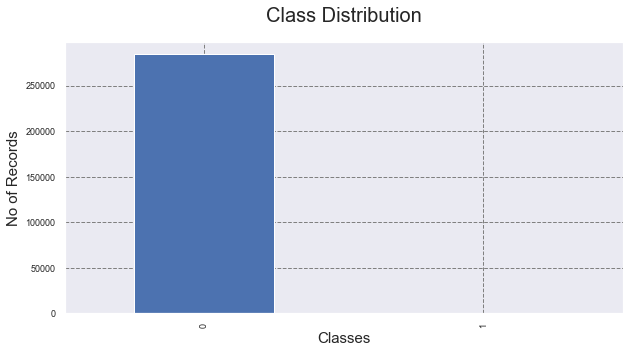

In [133]:
#Bar Chart for Class Distribution
ax1 = creditcard_data_df['Class'].value_counts().plot.bar(
figsize=(10, 5),
fontsize=9,
)
ax1.set_ylabel("No of Records",fontsize=15)
ax1.set_xlabel("Classes",fontsize=15)
plt.grid(color='gray', linestyle='dashed')
plt.title("Class Distribution",fontsize=20).set_position([.5, 1.05])
plt.show()

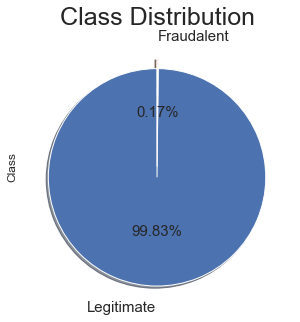

In [134]:
#Pie chart for Class Distribution
plt.figure(figsize=[10,5])
explode = (0.1,0)
labels = 'Legitimate', 'Fraudalent'
ax2 = creditcard_data_df.Class.value_counts().plot.pie(
labels = labels,
autopct='%1.2f%%', 
pctdistance=0.5, 
labeldistance=1.2,
figsize=(10,5),
fontsize=15,
explode=explode,
shadow=True,
startangle=90
)
plt.title("Class Distribution",fontsize=25)
plt.show()

From the above class distribution information it can be clearly understood that there is a huge class imbalance in the data set.If we use this data for training ,the ML model will not have enough data to understand the basis of fraud. So, it would always predict majority class(i.e is 0 in this case) which undermines our problem statement.

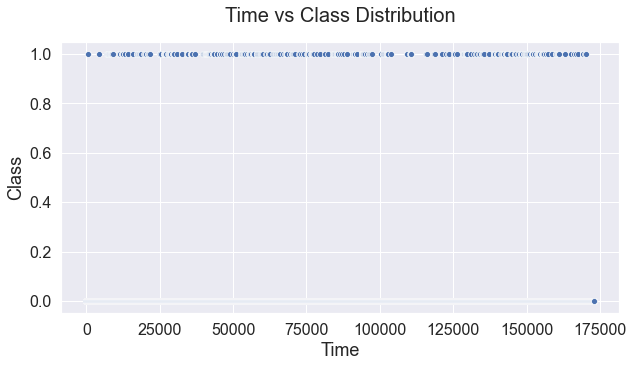

In [135]:
# Scatter plot to observe the distribution of classes with time
fig = plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')
plt.title('Time vs Class Distribution', size=20, y=1.05)
sns.scatterplot(x=creditcard_data_df['Time'], y='Class',  data=creditcard_data_df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 

We can see that there is not impact of Time on class distribution. There are no patterns in the above plot.

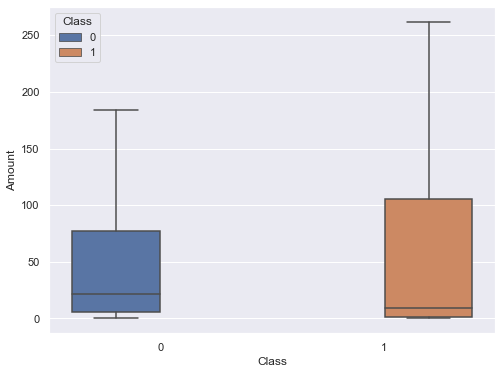

In [136]:
### Checking for Outliers
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = creditcard_data_df,showfliers=False) 
plt.show()

As this is a PCA transformed data set there shouldn't be any outliers, the above check is for confirmation.





In [137]:
# Creating non fraudulent dataframe
non_fraud_df = creditcard_data_df[creditcard_data_df['Class'] == 0]
# Creating fraudulent dataframe
fraud_df = creditcard_data_df[creditcard_data_df['Class'] == 1]

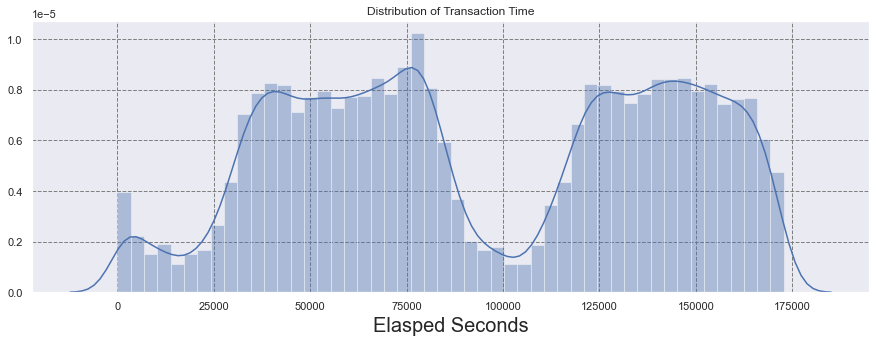

In [138]:
#Distribution plot for transaction Time 
plt.figure(figsize=(15,5))
plt.title('Distribution of Transaction Time')
ax = sns.distplot(creditcard_data_df['Time'])
ax.set_xlabel("Elasped Seconds",fontsize=20)
plt.grid(color='gray', linestyle='dashed')

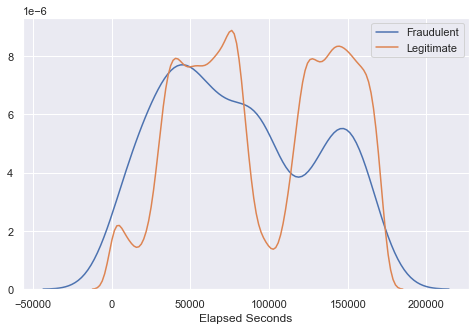

In [139]:
#Distribution of classes with time
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_df['Time'],label='Fraudulent',hist=False)
ax = sns.distplot(non_fraud_df['Time'],label='Legitimate',hist=False)
ax.set(xlabel='Elapsed Seconds')
plt.show()

No specific pattern is observed between the fraudulent and legitimate transctions with respect to Time.

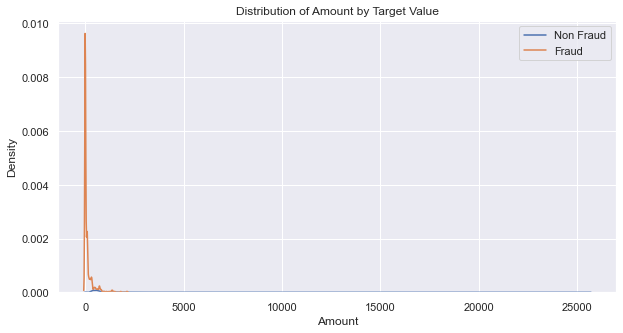

In [140]:
#Plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,5))
sns.kdeplot(creditcard_data_df.loc[creditcard_data_df['Class'] == 0, 'Amount'], label = 'Non Fraud')
sns.kdeplot(creditcard_data_df.loc[creditcard_data_df['Class'] == 1, 'Amount'], label = 'Fraud')
plt.title('Distribution of Amount by Target Value')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

From above It can be understood that the fraudulent transctions are mostly in the lower range of amount, where as the non-fraudulent transctions are spread in a wide range.



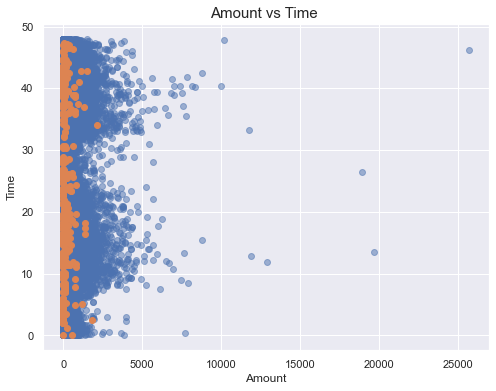

In [141]:
#Time vs Amount
fig = plt.figure(figsize = (8,6))
plt.scatter(non_fraud_df.Amount, non_fraud_df.Time.values/(60*60),alpha=0.5,label='Legitimate')
plt.scatter(fraud_df.Amount, fraud_df.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Amount vs Time ',fontsize=15)
plt.show()

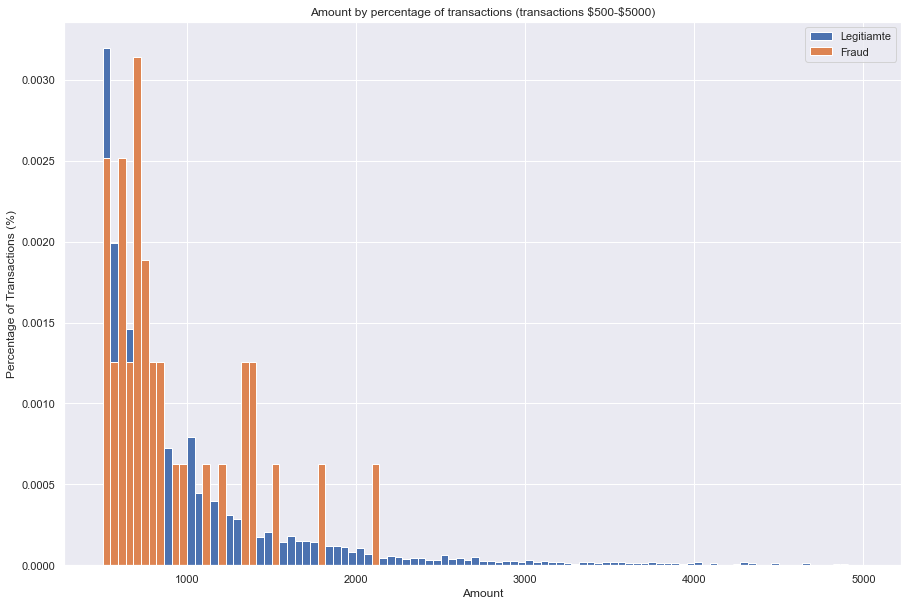

In [142]:
#Plotting High value Transactions Graph
plt.figure(figsize=[15,10])
bins = np.linspace(500, 5000, 100)
plt.hist(non_fraud_df.Amount, bins, alpha=1, density=True, label='Legitiamte')
plt.hist(fraud_df.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$500-$5000)")
plt.xlabel("Amount")
plt.ylabel("Percentage of Transactions (%)")
plt.show()

It is not possible to differentiate between fraud and legitimate transaction using transaction amount.

### Splitting the data into train & test data

In [143]:
X = creditcard_data_df.drop(['Class'],axis = 1) # Features
y = creditcard_data_df['Class'] # Target Variable

In [144]:
# Splitting data into train and test set 70:30
kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc, X.iloc
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


### Feature Scaling

In [22]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


#### Checking the Skewness

In [23]:
# Listing the columns
cols = X.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

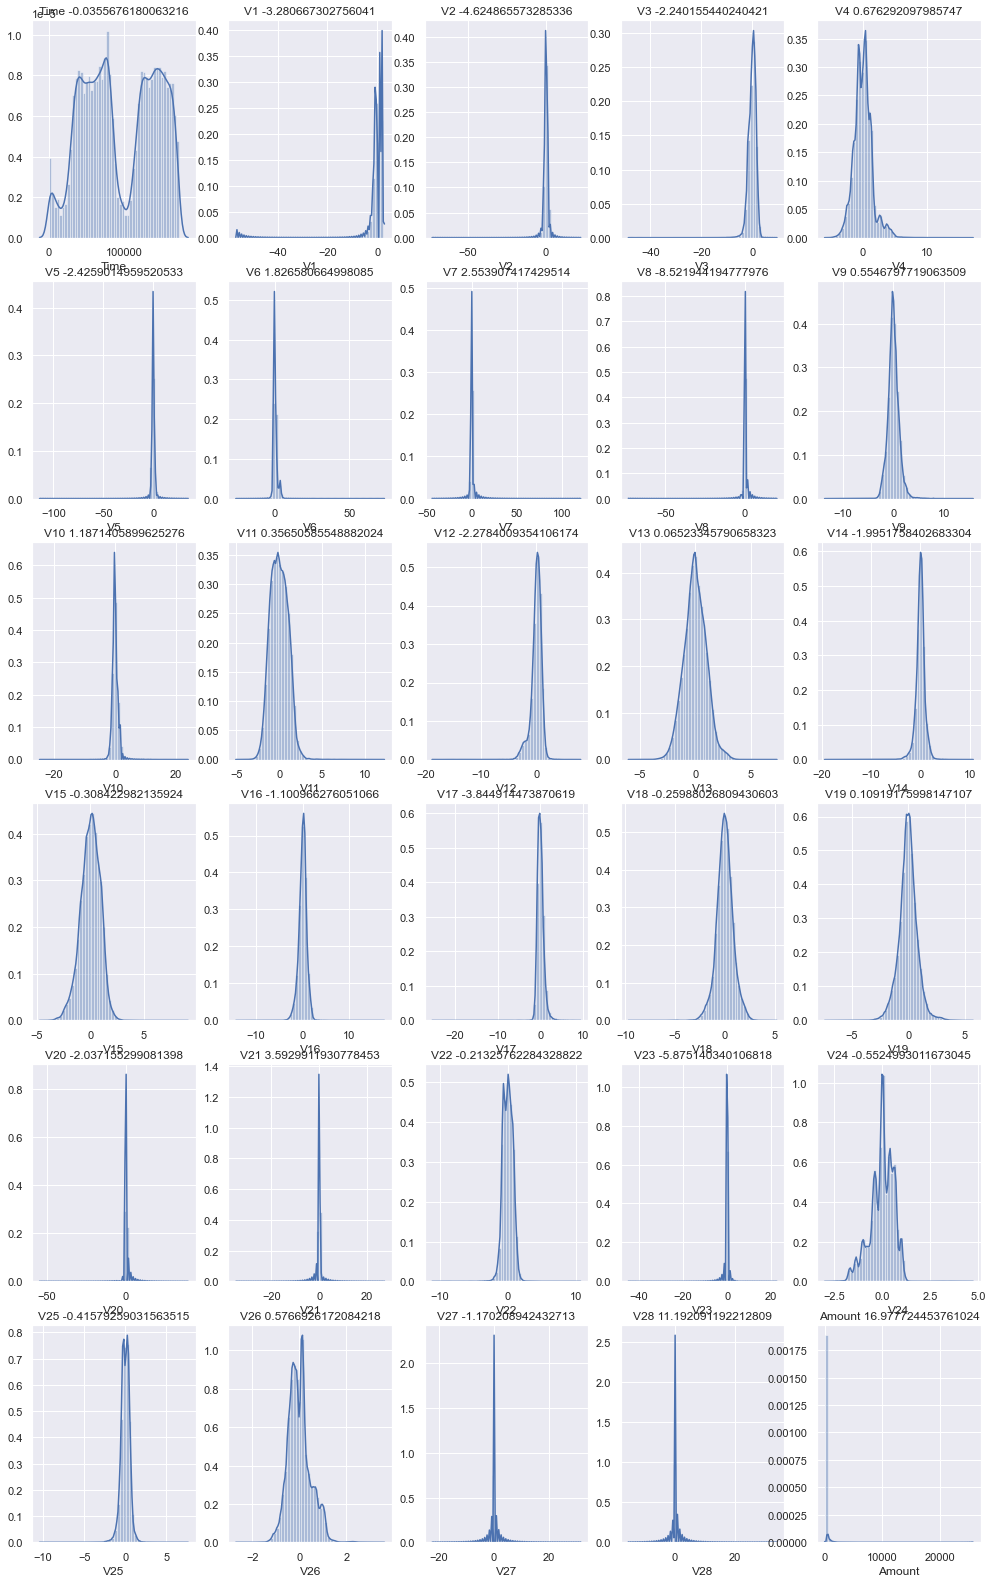

In [24]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))

It can be seen that many variables are heavily skewed. We will have to mitigate the skewness to bring them into normal distribution

In [25]:
# Instantiate the powertransformer
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X[cols] = pt.fit_transform(X)
PWTR_X = pt.fit_transform(creditcard_data_df.drop(['Class'],axis = 1))

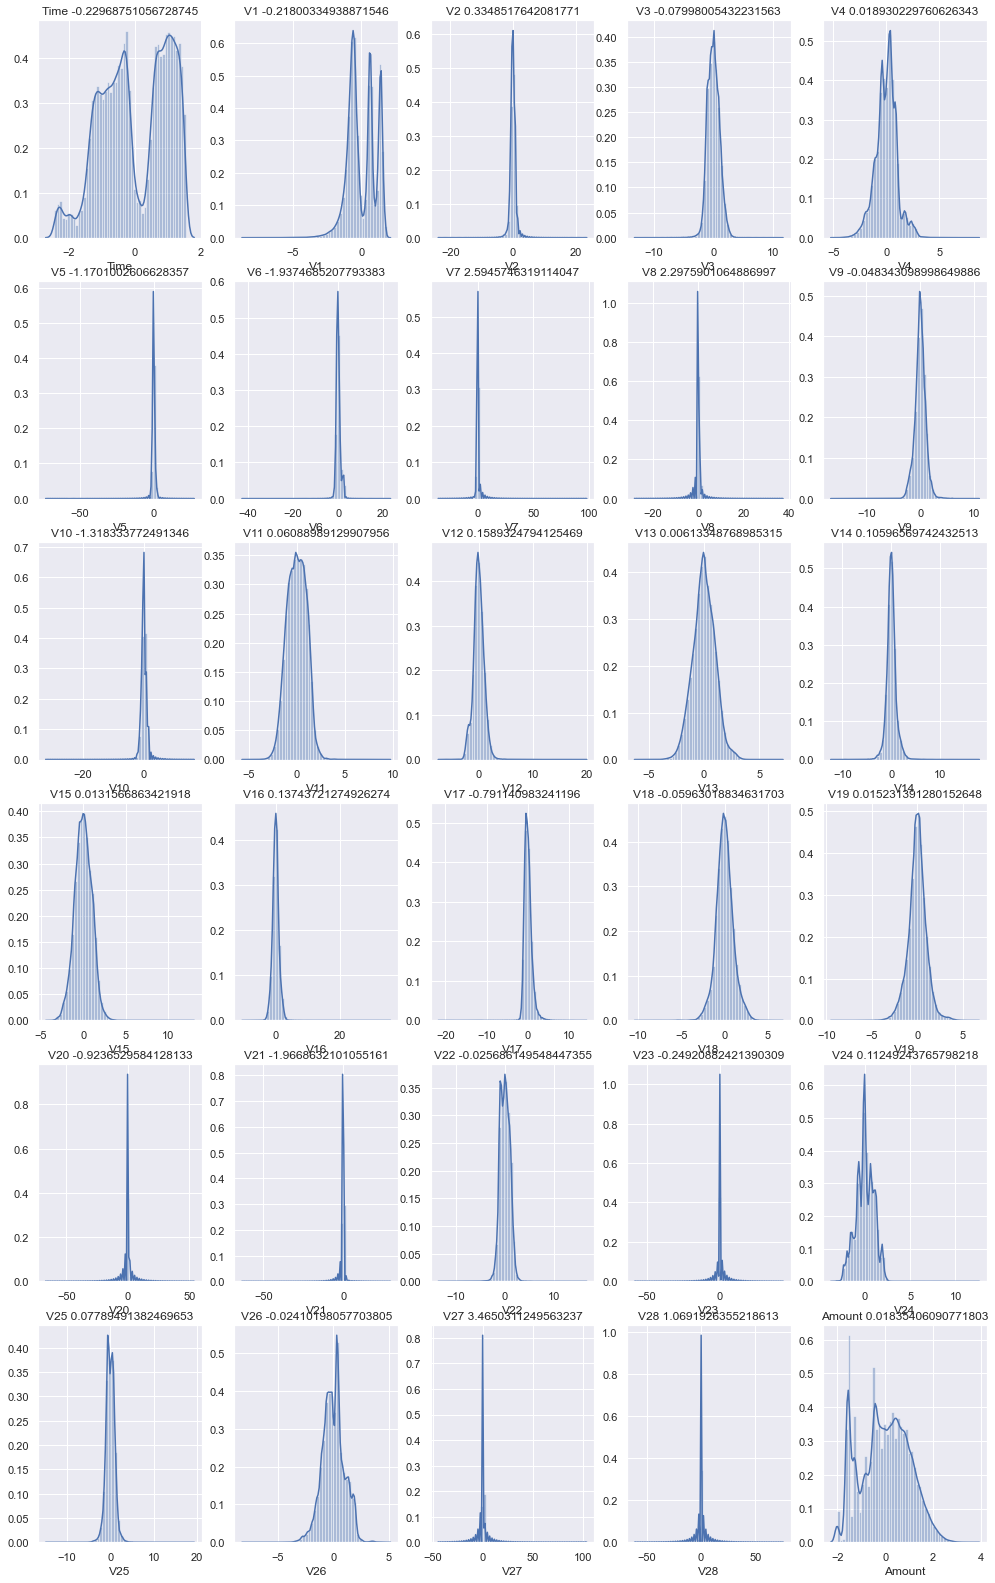

In [26]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))

We can see that all the variables are normally distributed after the transformation.

### Model Building On Imbalanced Data Set

#### Model 1: Logistic Regression Model

In [27]:
#Evaluation Metrices
def eval_metrics(y_test,y_predicted):
    print('Classification report:\n', classification_report(y_test, y_predicted))
    print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
    print("Accuracy: ",accuracy_score(y_test,y_predicted))
    print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

In [28]:
# Function for roc_curve
def plot_roc_curve(y_test,y_predicted):
    # Create true and false positive rates
    fpr, tpr, threshold = roc_curve(y_test, y_predicted)
    roc_auc = roc_auc_score(y_test, y_predicted)
    # Plot the roc curve 
    plt.rcParams['figure.figsize'] = [6,6]
    plt.plot(fpr, tpr, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [29]:
kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(PWTR_X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = PWTR_X[train_index], PWTR_X[test_index]
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


In [30]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to train data
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Predict on test data
y_predicted = model_lr.predict(X_test)

In [32]:
# Evaluation Metrics
eval_metrics(y_test,y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.60      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   59    89]]
Accuracy:  0.999133925541004
ROC AUC :  0.8005877455508148


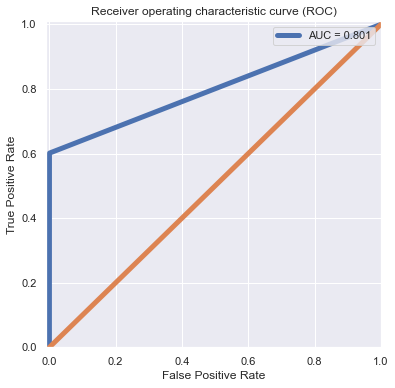

In [33]:
plot_roc_curve(y_test,y_predicted)

Precision : 0.86 <br>
Recall : 0.60  <br>
F1-score : 0.71<br>
Accuracy : 0.99<br>
ROC AUC : 0.80<br>

#### Model 2:Logistic Regression on Imbalanced Data with K-Fold Cross validation and Hypertuning

In [34]:
# Number of folds

n_folds = 5
# parameters 
params ={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

lrh = LogisticRegression()

model_lrh = GridSearchCV(estimator=lrh, cv=n_folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [35]:
# Fitting the model

model_lrh.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [36]:
print("Logistic Regression with PCA Best AUC : ", model_lrh.best_score_)
print("Logistic Regression with PCA Best hyperparameters: ", model_lrh.best_params_)

Logistic Regression with PCA Best AUC :  0.9804184472371569
Logistic Regression with PCA Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


In [37]:
# Building model with the best parameteres
model_lrh_tuned = LogisticRegression(penalty='l2',C=0.1)

In [38]:
# Predicting on test data
model_lrh_tuned.fit(X_train,y_train)
y_predicted = model_lrh_tuned.predict(X_test)

In [39]:
# Evaluation Metrics
eval_metrics(y_test,y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   61    87]]
Accuracy:  0.9991105181231933
ROC AUC :  0.7938309887940581


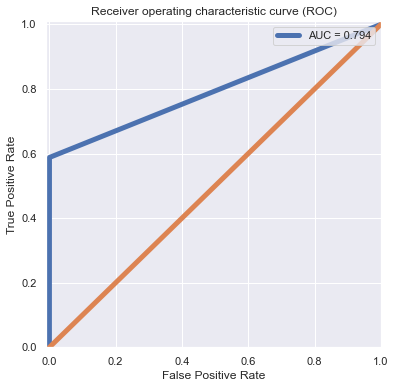

In [40]:
plot_roc_curve(y_test,y_predicted)

Precision : 0.85 <br>
Recall : 0.59<br>
F1-score : 0.70<br>
Accuracy : 0.99<br>
ROC AUC : 0.79<br>

#### Model 3: Random Forest

In [41]:
#Initializing Random forest and creating model
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_jobs=-1, 
                             random_state=2021,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [42]:
# Fitting the model on Train data and Predicting on Test data

model_rfc.fit(X_train,y_train)
y_predicted = model_rfc.predict(X_test)

In [43]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.68      0.79       148

    accuracy                           1.00     85443
   macro avg       0.97      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85288     7]
 [   47   101]]
Accuracy:  0.9993679997191109
ROC AUC :  0.8411751821579478


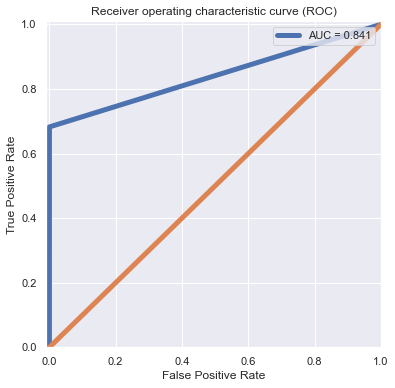

In [44]:
plot_roc_curve(y_test,y_predicted)

Precision : 0.94 <br>
Recall : 0.68 <br>
F1-score : 0.79<br>
Accuracy : 0.99<br>
ROC AUC : 0.84<br>

#### Model 4: Random Forest on Imbalanced Data with K-Fold Cross validation and Hyperparamater Tuning

In [45]:
# Defining Parameters
params = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [46]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train, y_train)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 50, cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [47]:
# Passing the best parameteres based on Randomized Search CV
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='gini',
                               max_depth=5,
                               max_features='sqrt',
                               min_samples_leaf=10,
                               n_estimators=200,
                               n_jobs=-1, 
                               random_state=5)

In [48]:
# Fitting the model on Train data and Predicting on Test Data

model_rfc_tuned.fit(X_train,y_train)
y_predicted = model_rfc_tuned.predict(X_test)

In [49]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.71      0.76       148

    accuracy                           1.00     85443
   macro avg       0.91      0.85      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85271    24]
 [   43   105]]
Accuracy:  0.9992158515033414
ROC AUC :  0.8545890415299524


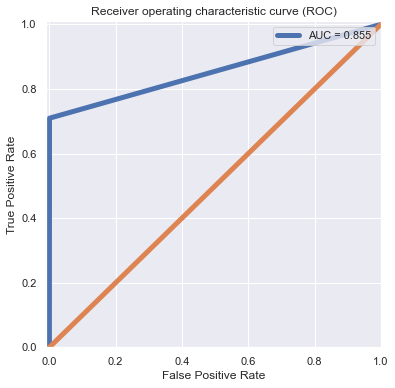

In [50]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.81 <br>
Recall : 0.71 <br>
F1-score : 0.76 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.85 <br>

#### Model 5: XG Boost

In [51]:
#Initialization
model_xgb = XGBClassifier()

In [52]:
# Fitting the model on Train data and Predicting on Test data
model_xgb.fit(X_train,y_train)
y_predicted = model_xgb.predict(X_test)

In [53]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.74      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85289     6]
 [   38   110]]
Accuracy:  0.9994850368081645
ROC AUC :  0.8715864495716773


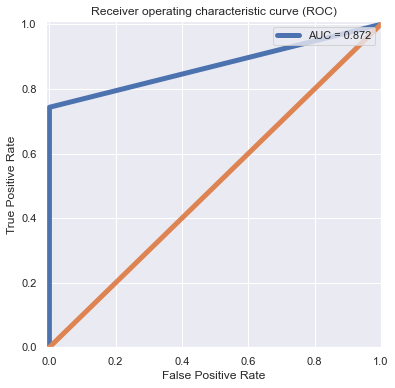

In [54]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.95 <br> 
Recall : 0.74 <br>
F1-score : 0.83 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.87 <br>

#### Model 6: XGB Hyperparameter Tuning 

In [55]:
# Defining parameters
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [56]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train, y_train)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [57]:
# Passing the best parameteres based on Randomized Search CV
model_xgb_tuned = XGBClassifier(min_child_weight= 5,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [58]:
# Fitting the model on Train data and Predicting on Test data
model_xgb_tuned.fit(X_train,y_train)
y_predicted = model_xgb_tuned.predict(X_test)

In [59]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     5]
 [   42   106]]
Accuracy:  0.9994499256814484
ROC AUC :  0.8580787980664878


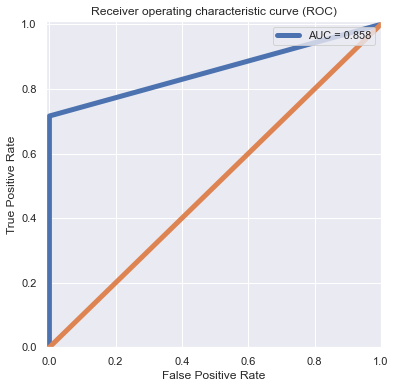

In [60]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.95 <br>
Recall : 0.72 <br>
F1-score : 0.82 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.85 <br>

### Balancing the Data set

In [61]:
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
adasyn = ADASYN(random_state=5)

In [62]:
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_adasyn, y_train_adasyn =adasyn.fit_sample(X_train,y_train)

### Print the class distribution after applying SMOTE

#### Model building with Balanced Data

#### Model 7: Logistic Regression on ROS Balanced Data Set

In [63]:
# Fit a logistic regression model to our data
model_lr = LogisticRegression()
model_lr.fit(X_train_ros, y_train_ros)

#Predictions on test data
y_predicted = model_lr.predict(X_test)

In [64]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.91      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83254  2041]
 [   13   135]]
Accuracy:  0.9759605819084067
ROC AUC :  0.9441167220916914


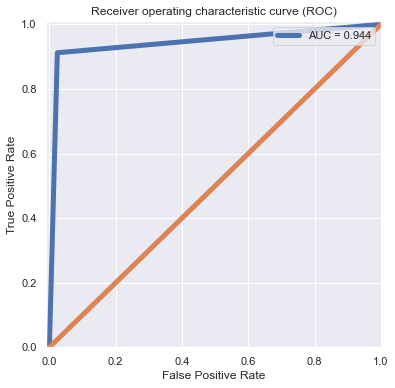

In [65]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.06 <br>
Recall : 0.91 <br>
F1-score : 0.12 <br>
Accuracy : 0.97 <br>
ROC AUC : 0.94 <br>

#### Model 8: Logistic Regression on on SMOTE Balanced Data

In [66]:
# Fit a logistic regression model to our data

model_lr = LogisticRegression()
model_lr.fit(X_train_smote, y_train_smote)

#Predictions on test data
y_predicted = model_lr.predict(X_test)

In [67]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.91      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Confusion matrix:
 [[83076  2219]
 [   14   134]]
Accuracy:  0.9738656180143488
ROC AUC :  0.9396949062316317


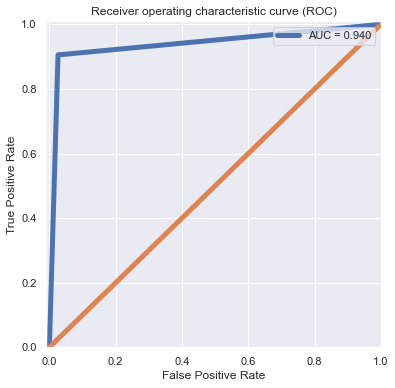

In [68]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.06 <br>
Recall : 0.91 <br>
F1-score : 0.11 <br>
Accuracy : 0.97 <br>
ROC AUC : 0.93 <br>

#### Model 9: Logistic Regression on ADASYN Balanced Data

In [69]:
model_lr = LogisticRegression()
model_lr.fit(X_train_adasyn, y_train_adasyn)

y_predicted = model_lr.predict(X_test)

In [70]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.91      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.95     85443

Confusion matrix:
 [[78046  7249]
 [   13   135]]
Accuracy:  0.915007665929333
ROC AUC :  0.9135873827400295


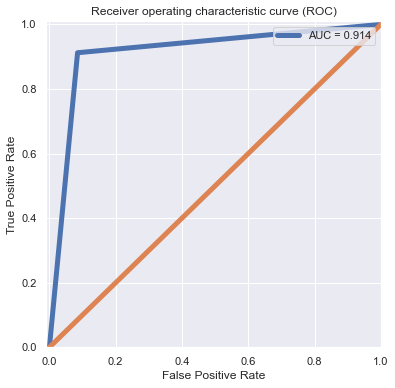

In [71]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.02 <br> 
Recall : 0.91 <br>
F1-score : 0.04 <br>
Accuracy : 0.91 <br>
ROC AUC : 0.91 <br>

#### Model 10: Random Forest on ROS Balanced Data

In [72]:
# Model Insantiation
model_rfc = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=10, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=20, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)

In [73]:
# Fiting the model on training data and predictions on test data 
model_rfc.fit(X_train_ros,y_train_ros)
y_predicted = model_rfc.predict(X_test)

In [74]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.50      0.78      0.61       148

    accuracy                           1.00     85443
   macro avg       0.75      0.89      0.80     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85179   116]
 [   32   116]]
Accuracy:  0.9982678510820079
ROC AUC :  0.8912118989263018


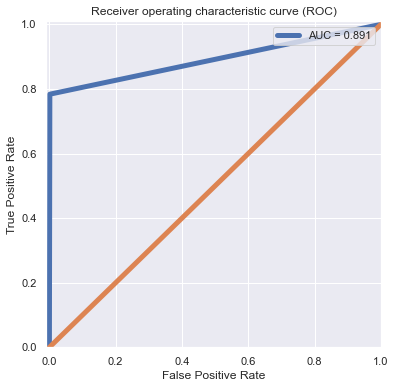

In [75]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.50 <br>
Recall : 0.78 <br>
F1-score : 0.61 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.89 <br>

#### Model 11: Random Forest on SMOTE Balanced Data

In [76]:
model_rfc.fit(X_train_smote,y_train_smote)
y_predicted = model_rfc.predict(X_test)

In [77]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.84      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83462  1833]
 [   23   125]]
Accuracy:  0.9782779162716665
ROC AUC :  0.9115522360393103


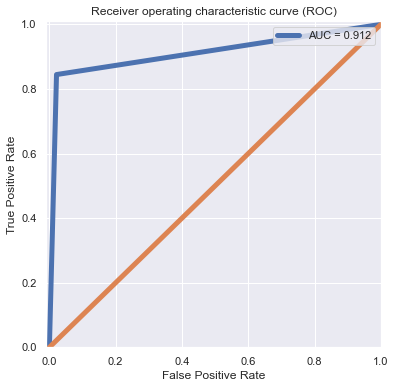

In [78]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.05 <br> 
Recall : 0.84 <br>
F1-score : 0.12 <br>
Accuracy : 0.97 <br>
ROC AUC : 0.91 <br>

#### Model 12: Random Forest on ADASYN Balanced Data

In [79]:
model_rfc.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_rfc.predict(X_test)

In [80]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.03      0.84      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.90      0.52     85443
weighted avg       1.00      0.95      0.98     85443

Confusion matrix:
 [[81463  3832]
 [   24   124]]
Accuracy:  0.9548704984609623
ROC AUC :  0.8964557030211523


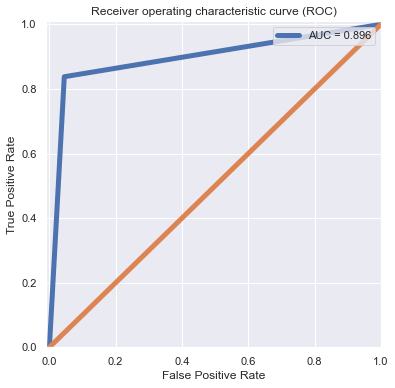

In [81]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.03 <br>
Recall : 0.84 <br>
F1-score : 0.06 <br>
Accuracy : 0.95 <br>
ROC AUC : 0.89 <br>

#### Model 13: Hyperparameter Tuning Random Forest on ROS Data

In [82]:
params = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [83]:
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train_ros, y_train_ros)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 50, cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [84]:
# Insanitiate Model on best params
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, 
                               criterion='entropy',
                               max_depth=8, 
                               max_features='auto',
                               n_estimators=200,
                               n_jobs=-1)

In [85]:
#Fiting the model on training data and predicting the model on test data
model_rfc_tuned.fit(X_train_ros,y_train_ros)
y_predicted = model_rfc_tuned.predict(X_test)

In [86]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.25      0.79      0.38       148

    accuracy                           1.00     85443
   macro avg       0.63      0.89      0.69     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[84947   348]
 [   31   117]]
Accuracy:  0.9955642943248716
ROC AUC :  0.8932302913735002


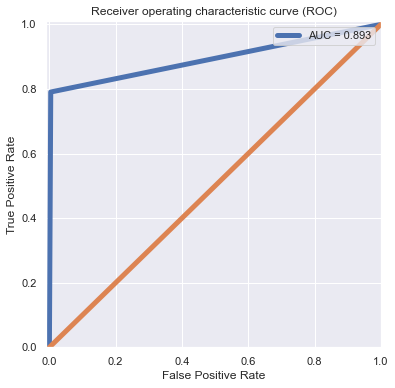

In [87]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.25 <br>
Recall : 0.79 <br>
F1-score : 0.38 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.89 <br>

#### Model 14: XG Boost

XG Boost on ROS Balanced Data

In [88]:
model_xgb_ros = XGBClassifier()

In [89]:
#Fitting the model on training data and predicting the model on test data
model_xgb_ros.fit(X_train_ros,y_train_ros)
y_predicted = model_xgb_ros.predict(X_test)

In [90]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.76      0.83       148

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    10]
 [   36   112]]
Accuracy:  0.9994616293903538
ROC AUC :  0.8783197582951379


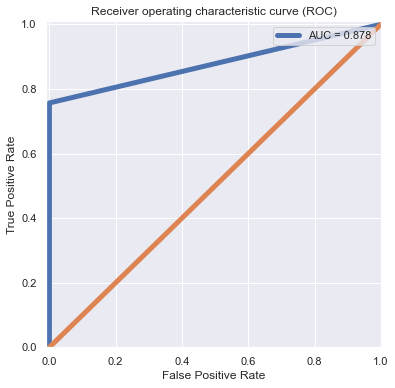

In [91]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.92 <br>
Recall : 0.76 <br>
F1-score : 0.83 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.87 <br>

#### Model 15: Hyperparameter Tuning on ROS Balanced data

In [92]:
#Parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [93]:
cross_val = StratifiedKFold(n_splits=4)
index_iterator = cross_val.split(X_train_ros, y_train_ros)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [94]:
model_xgb_tuned_ros = XGBClassifier(min_child_weight= 5,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [95]:
#Fitting the model on training data and predicting the model on test data
model_xgb_tuned_ros.fit(X_train_ros,y_train_ros)
y_predicted = model_xgb_tuned_ros.predict(X_test)

In [96]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.77      0.84       148

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    10]
 [   34   114]]
Accuracy:  0.9994850368081645
ROC AUC :  0.8850765150518946


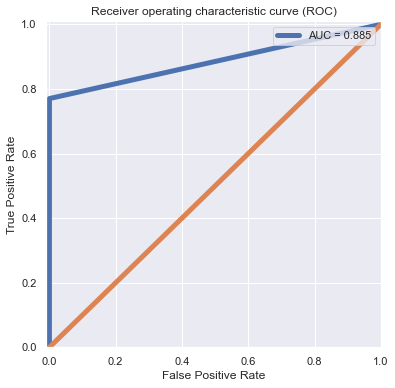

In [97]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.92 <br>
Recall : 0.77 <br>
F1-score : 0.84 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.88 <br>

#### Model 16: XGB on SMOTE Balanced Data

In [98]:
model_xgb_smote = XGBClassifier()

In [99]:
#Fitting the model on training data and predicting the model on test data
model_xgb_smote.fit(X_train_smote,y_train_smote)
y_predicted = model_xgb_smote.predict(X_test)

In [100]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.76      0.79       148

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85270    25]
 [   35   113]]
Accuracy:  0.9992977774656788
ROC AUC :  0.8816102065486555


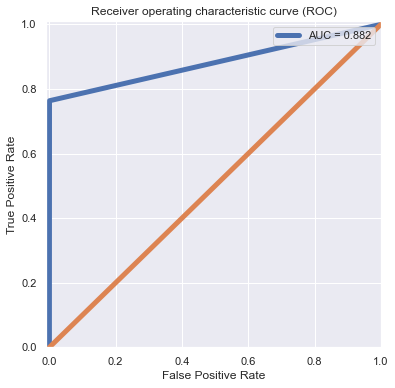

In [101]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.82 <br>
Recall : 0.76 <br>
F1-score : 0.79 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.88 <br>

#### Model 17: Hyperparameter Tuning on Smote Balanced data

In [102]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10,15],
        'gamma': [0.5, 1, 1.5, 2, 5,8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0,1.2],
        'max_depth': [3, 4, 5,6,7]
        }

In [103]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train_smote, y_train_smote)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =40 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [104]:
model_xgb_tuned_smote = XGBClassifier(min_child_weight= 10,
        gamma= 1.5,
        subsample= 0.6,
        colsample_bytree= 0.6,
        max_depth= 5)

In [105]:
#Fitting the model on training data and predicting the model on test data
model_xgb_tuned_smote.fit(X_train_smote,y_train_smote)
y_predicted = model_xgb_tuned.predict(X_test)

In [106]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     5]
 [   42   106]]
Accuracy:  0.9994499256814484
ROC AUC :  0.8580787980664878


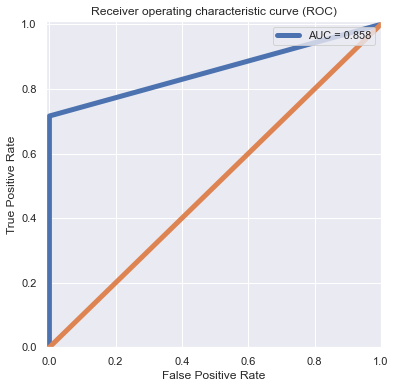

In [107]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.95 <br>
Recall : 0.72 <br>
F1-score : 0.82 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.85 <br>

#### Model 18: XGB on ADASYN Balanced Data

In [108]:
model_xgb_adasyn = XGBClassifier()

In [109]:
#Fitting the model on training data and predicting the model on test data
model_xgb_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_xgb_adasyn.predict(X_test)

In [110]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.76      0.76       148

    accuracy                           1.00     85443
   macro avg       0.88      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85259    36]
 [   36   112]]
Accuracy:  0.9991573329588147
ROC AUC :  0.8781673460787126


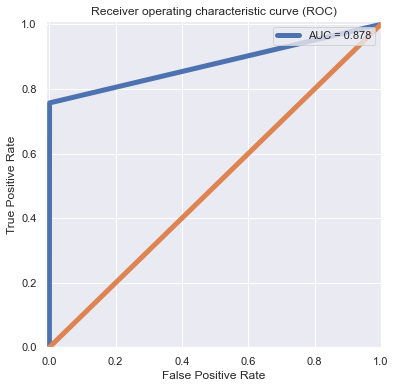

In [111]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.76 <br>
Recall : 0.76 <br>
F1-score : 0.76 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.87 <br>

#### Model 19: Hyperparameter Tuning on Adasyn Balanced data

In [112]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [113]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train_adasyn, y_train_adasyn)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [114]:
model_xgb_tuned_adasyn = XGBClassifier(min_child_weight= 10,
        gamma= 1.5,
        subsample= 0.6,
        colsample_bytree= 0.6,
        max_depth= 5)

In [115]:
#Fitting the model on training data and predicting the model on test data
model_xgb_tuned_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_xgb_tuned_adasyn.predict(X_test)

In [116]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.54      0.77      0.64       148

    accuracy                           1.00     85443
   macro avg       0.77      0.88      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85198    97]
 [   34   114]]
Accuracy:  0.9984668141333989
ROC AUC :  0.884566520327702


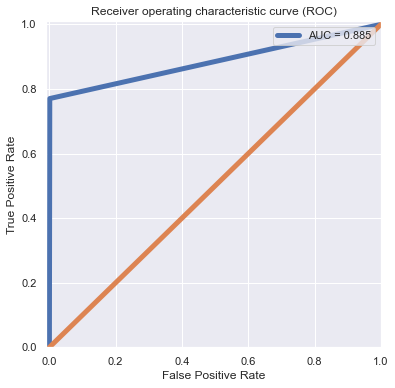

In [117]:
plot_roc_curve(y_test, y_predicted)

Precision : 0.54 <br>
Recall : 0.77 <br>
F1-score : 0.64 <br>
Accuracy : 0.99 <br>
ROC AUC : 0.88 <br>

### Analysis

Our main focus in this problem statement is to detect most of the fraud cases(recall) while controlling the precision.XGBoost on Smote data and got the best evaluation metrices.

In [118]:
#Predicting on the test data using the best model
y_predicted = model_xgb_smote.predict(X_test)

In [119]:
eval_metrics(y_test, y_predicted)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.76      0.79       148

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85270    25]
 [   35   113]]
Accuracy:  0.9992977774656788
ROC AUC :  0.8816102065486555


### Important Features

In [120]:
target = 'Class'
pca_comp = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount', 'Time']

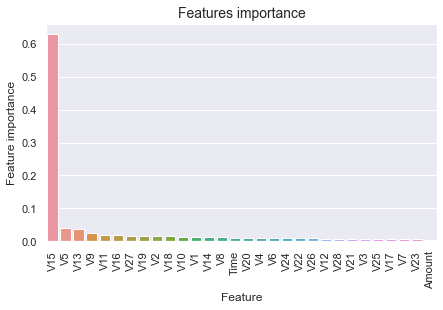

In [121]:
tmp = pd.DataFrame({'Feature': pca_comp, 'Feature importance': model_xgb_smote.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

Top var = 15
2nd Top var = 5
3rd Top var = 13


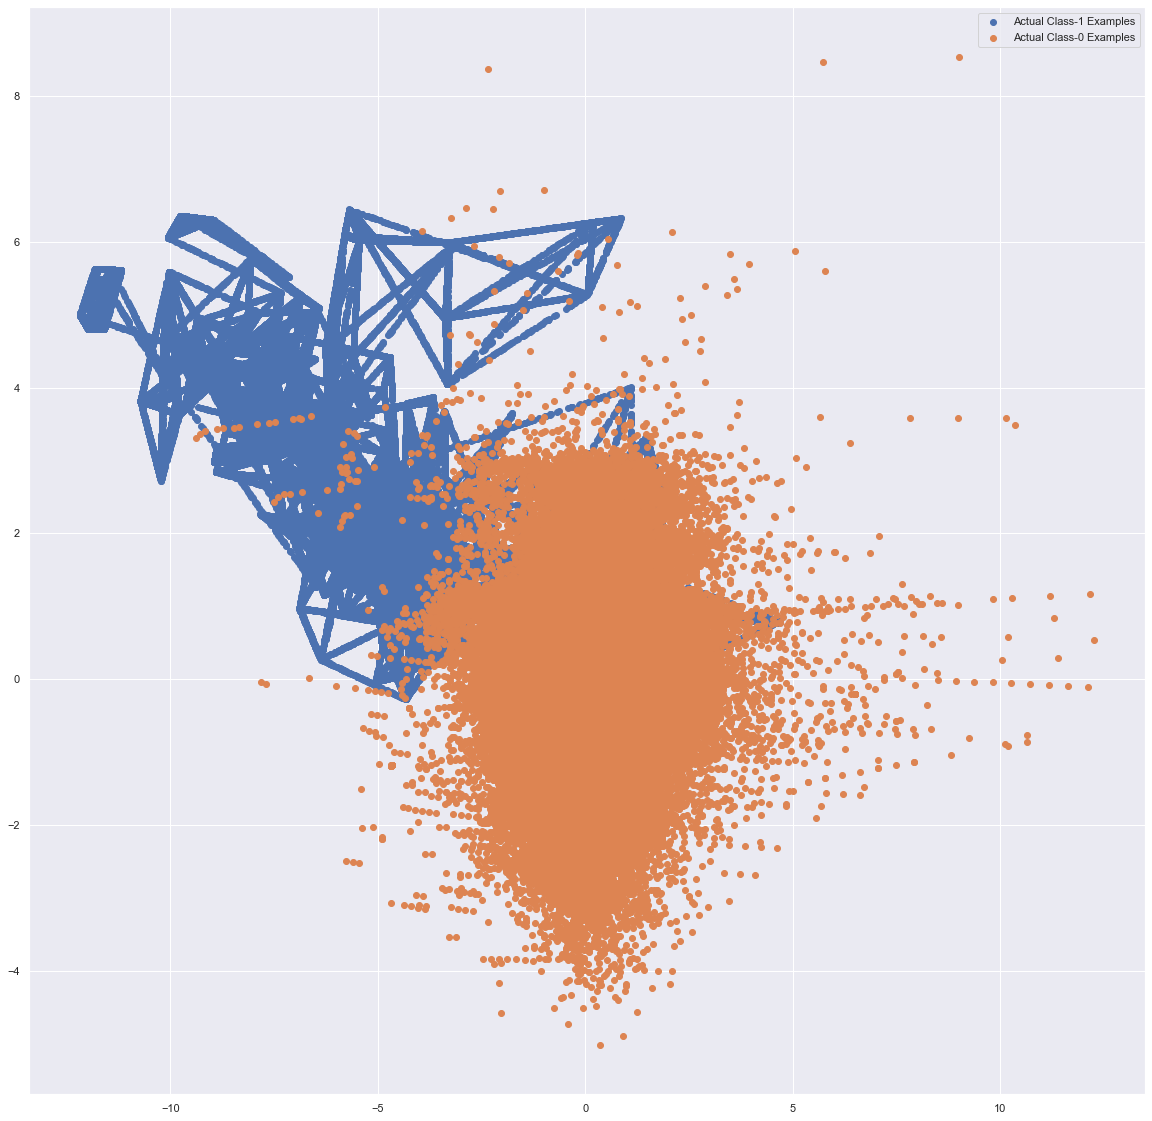

In [123]:
# Features of XGBoost model

var_imp = []
for i in model_xgb_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(model_xgb_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(model_xgb_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(model_xgb_smote.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(model_xgb_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(model_xgb_smote.feature_importances_)[-2])

X_train_1 = X_train_smote[np.where(y_train_smote==1.0)]
X_train_0 = X_train_smote[np.where(y_train_smote==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

Maximum variance can be explained with PCA converted variables like V15, V5.

### Conclusion

-We were provided with a highly imbalanced data set. We applied balancing techniques like ROS,SMOTE,ADASYN to mitigate data imbalance. We used highly powerful algorithms such as Logistic Regression,RF boosting techniques such as XG Boost to detect fraud transactions.<br>
-Our main criteria was to find the bestn Recall and AUC. We were able to build a model which provided good results.<br>
-We were able to figure out the important variables which help in detection of fraud transactions.<br>
